# India House Price data

In [1]:
# ! pip install matplotlib==3.7.3

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [97]:
import sys
import os
import re
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import duckdb
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))

module_path = Path.cwd().parent
# print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
# print(sys.path)
import settings
# from kaggle import settingsb
%matplotlib inline

In [69]:
import matplotlib
matplotlib.__version__

'3.7.3'

In [70]:
# ! poetry show | grep matplotlib

In [71]:
# ! pip freeze | grep matplotlib

## Configuration

In [72]:
csv_file = settings.DATA_FOLDER /'house_prices.csv'

In [73]:
print(f'{csv_file} {csv_file.exists()}')

/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/src/data/house_prices.csv True


In [74]:
#df = pd.read_csv(csv_file)

#df.shape

In [75]:
# df.sample(5)

## Using duckdb

In [119]:
table_name = 'test'
db_file = f'{table_name}.duckdb'

conn = duckdb.connect(str(db_file))
sql = f"CREATE OR REPLACE TABLE {table_name} AS SELECT * FROM '{csv_file}';"
conn.execute(sql)
conn.commit()
conn.close()

In [120]:
# save_to_duckdb(df_f=df, table_name='test', db_path=)


In [121]:
conn = duckdb.connect(db_file)

In [122]:
conn.sql('SHOW TABLES')

┌─────────┐
│  name   │
│ varchar │
├─────────┤
│ test    │
└─────────┘

In [123]:
conn.sql('SELECT COUNT(*) FROM test;')

┌──────────────┐
│ count_star() │
│    int64     │
├──────────────┤
│        29451 │
└──────────────┘

In [124]:
conn.sql(f'DESCRIBE {table_name}')

┌───────────────────────┬─────────────┬─────────┬─────────┬─────────┬───────┐
│      column_name      │ column_type │  null   │   key   │ default │ extra │
│        varchar        │   varchar   │ varchar │ varchar │ varchar │ int32 │
├───────────────────────┼─────────────┼─────────┼─────────┼─────────┼───────┤
│ POSTED_BY             │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ UNDER_CONSTRUCTION    │ BIGINT      │ YES     │ NULL    │ NULL    │  NULL │
│ RERA                  │ BIGINT      │ YES     │ NULL    │ NULL    │  NULL │
│ BHK_NO.               │ BIGINT      │ YES     │ NULL    │ NULL    │  NULL │
│ BHK_OR_RK             │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ SQUARE_FT             │ DOUBLE      │ YES     │ NULL    │ NULL    │  NULL │
│ READY_TO_MOVE         │ BIGINT      │ YES     │ NULL    │ NULL    │  NULL │
│ RESALE                │ BIGINT      │ YES     │ NULL    │ NULL    │  NULL │
│ ADDRESS               │ VARCHAR     │ YES     │ NULL    │ NULL

In [125]:
df = conn.sql(f'SELECT * FROM {table_name}').df()

df.shape

(29451, 12)

In [126]:
renamed_mapping = {}
for c in df.columns:
    new_c_name = re.sub('[^0-9a-zA-Z_]+', '', c)
    renamed_mapping[c] = new_c_name.lower()  # .replace(' ', '_').replace('(', '').replace(')', '')
# renamed_mapping['targetprice_in_lacs'] = 'target_price_in_lacs'

df = df.rename(columns=renamed_mapping)


In [127]:
conn.sql(f"CREATE OR REPLACE {table_name} AS SELECT * FROM df"

SyntaxError: incomplete input (1144753142.py, line 1)

In [117]:
conn.sql(f'DESCRIBE {table_name}')

┌───────────────────────┬─────────────┬─────────┬─────────┬─────────┬───────┐
│      column_name      │ column_type │  null   │   key   │ default │ extra │
│        varchar        │   varchar   │ varchar │ varchar │ varchar │ int32 │
├───────────────────────┼─────────────┼─────────┼─────────┼─────────┼───────┤
│ POSTED_BY             │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ UNDER_CONSTRUCTION    │ BIGINT      │ YES     │ NULL    │ NULL    │  NULL │
│ RERA                  │ BIGINT      │ YES     │ NULL    │ NULL    │  NULL │
│ BHK_NO.               │ BIGINT      │ YES     │ NULL    │ NULL    │  NULL │
│ BHK_OR_RK             │ VARCHAR     │ YES     │ NULL    │ NULL    │  NULL │
│ SQUARE_FT             │ DOUBLE      │ YES     │ NULL    │ NULL    │  NULL │
│ READY_TO_MOVE         │ BIGINT      │ YES     │ NULL    │ NULL    │  NULL │
│ RESALE                │ BIGINT      │ YES     │ NULL    │ NULL    │  NULL │
│ ADDRESS               │ VARCHAR     │ YES     │ NULL    │ NULL

In [118]:
conn.close()

## EDA

In [83]:
df.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [85]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,"29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00"
mean,0.18,0.32,2.39,"19,802.17",0.82,0.93,21.30,76.84,142.90
std,0.38,0.47,0.88,"1,901,334.91",0.38,0.26,6.21,10.56,656.88
min,0.00,0.00,1.00,3.00,0.00,0.00,-37.71,-121.76,0.25
25%,0.00,0.00,2.00,900.02,1.00,1.00,18.45,73.80,38.00
50%,0.00,0.00,2.00,"1,175.06",1.00,1.00,20.75,77.32,62.00
75%,0.00,1.00,3.00,"1,550.69",1.00,1.00,26.90,77.83,100.00
max,1.00,1.00,20.00,"254,545,454.50",1.00,1.00,59.91,152.96,"30,000.00"


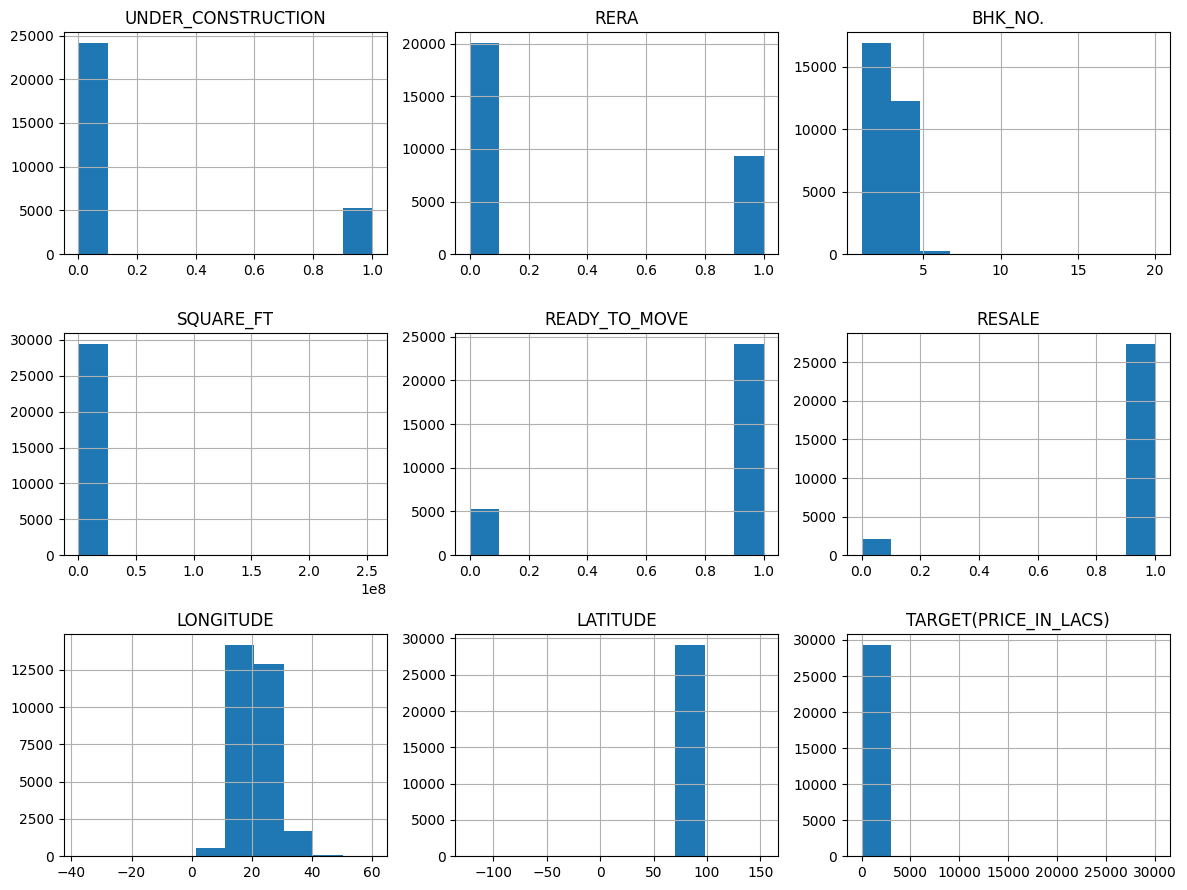

In [86]:
df.hist(figsize=(12,9))
plt.tight_layout()
plt.show()

In [87]:
sns.boxplot(data=df['square_ft'], orient='h')

KeyError: 'square_ft'

### Correlation

In [ ]:
df.corr()

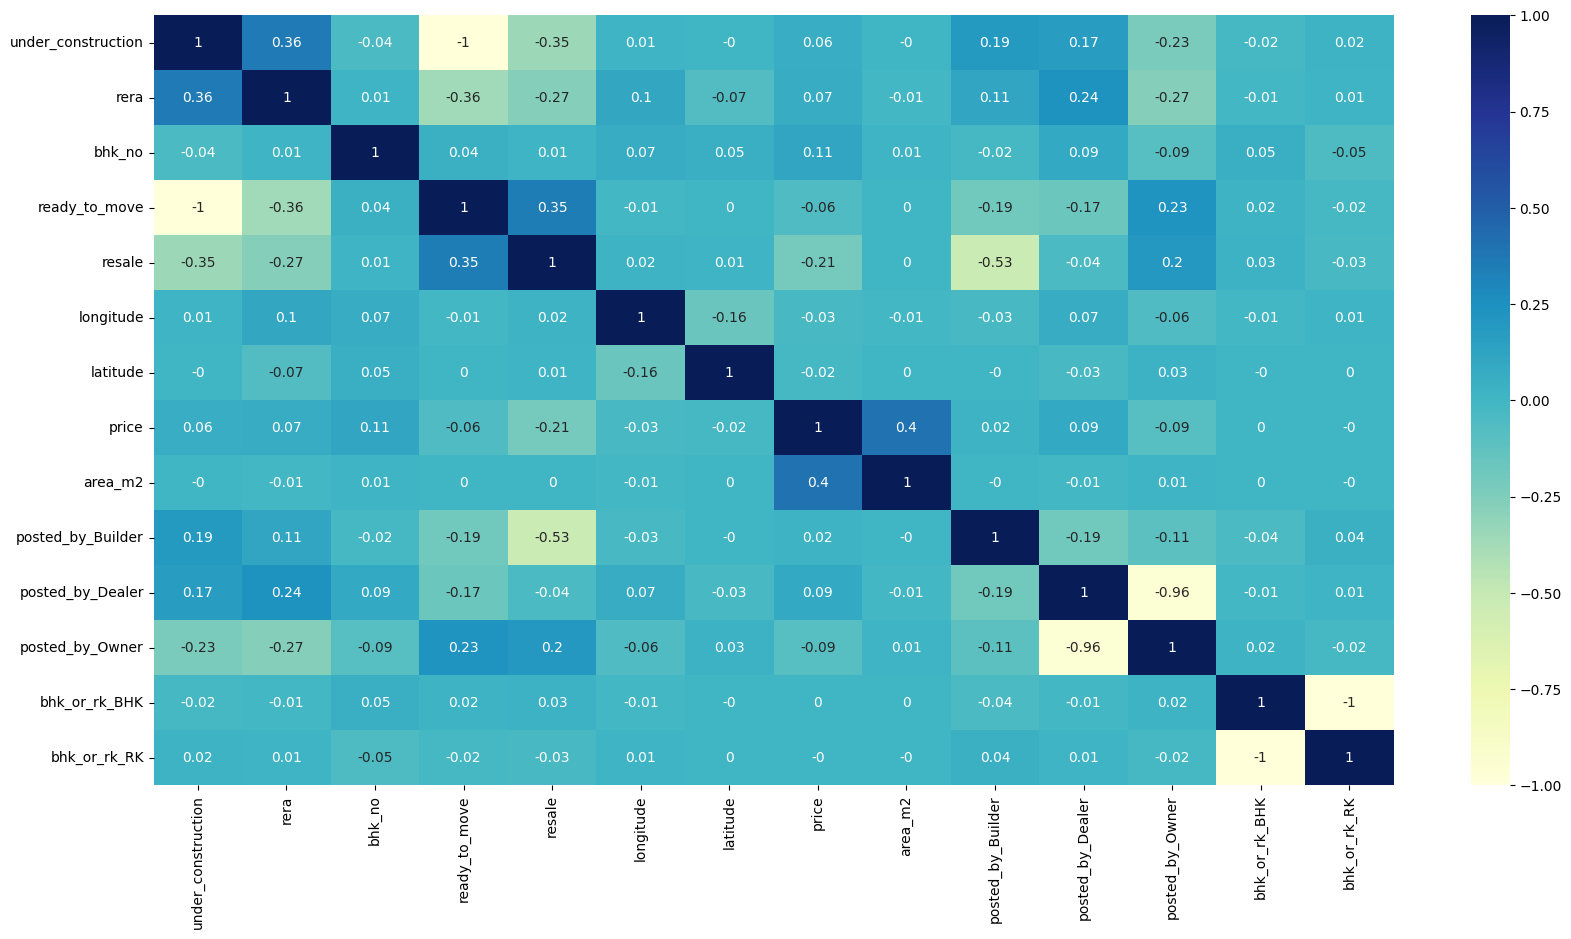

In [92]:

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().round(2), annot=True, cmap='YlGnBu', annot_kws={"size": 10})
#sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [93]:
import matplotlib
print(f'Pandas    : {pd.__version__}')
print(f'Seaborn   : {sns.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')

Pandas    : 2.1.0
Seaborn   : 0.12.2
Matplotlib: 3.7.3


In [94]:
! cat /etc/os-release

NAME="Pop!_OS"
VERSION="22.04 LTS"
ID=pop
ID_LIKE="ubuntu debian"
PRETTY_NAME="Pop!_OS 22.04 LTS"
VERSION_ID="22.04"
HOME_URL="https://pop.system76.com"
SUPPORT_URL="https://support.system76.com"
BUG_REPORT_URL="https://github.com/pop-os/pop/issues"
PRIVACY_POLICY_URL="https://system76.com/privacy"
VERSION_CODENAME=jammy
UBUNTU_CODENAME=jammy
LOGO=distributor-logo-pop-os


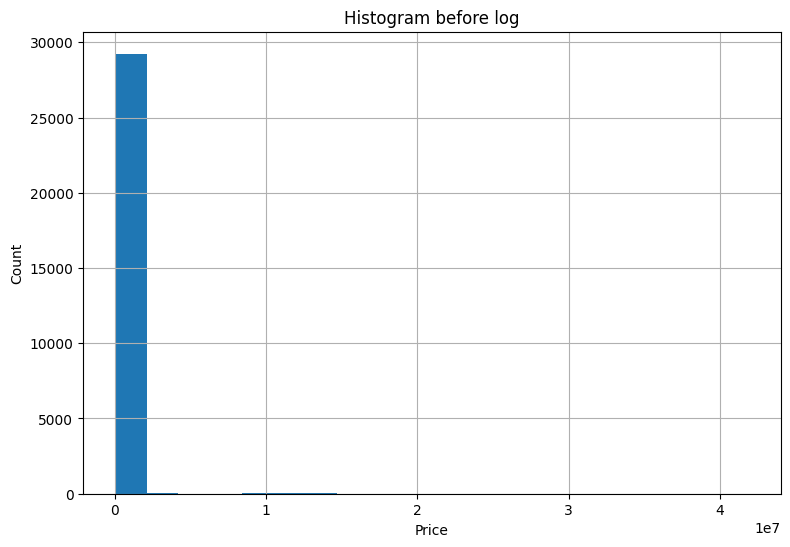

In [96]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title(f'Histogram before log')
ax.set_ylabel('Count')
ax.set_xlabel('Price')
df['price'].hist(bins=20)
plt.show()

In [98]:
df['price'].describe()

count       29,451.00
mean       199,629.55
std        917,662.36
min            349.25
25%         53,086.00
50%         86,614.00
75%        139,700.00
max     41,910,000.00
Name: price, dtype: float64

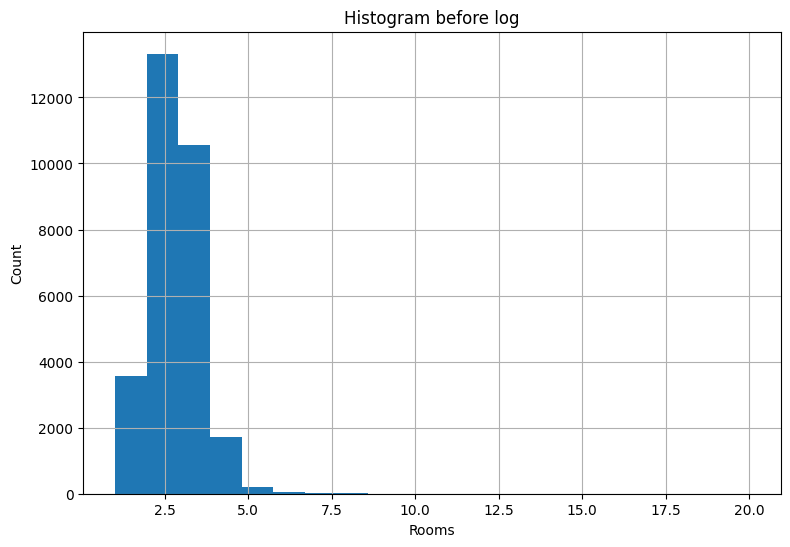

In [99]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title(f'Histogram before log')
ax.set_ylabel('Count')
ax.set_xlabel('Rooms')
df['bhk_no'].hist(bins=20)
plt.show()